In [5]:

import pandas as pd

# Lisez le fichier CSV en utilisant le chemin complet
df = pd.read_csv('data\\DATA_avecfeatures.csv', header=0)

# Afficher les données du dataset
print("Afficher les données du dataset :")
print(df.info())



Afficher les données du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    360 non-null    object 
 1   Mortgage_15yr           360 non-null    float64
 2   Gross Domestic Product  360 non-null    float64
 3   Home_price_index        360 non-null    float64
 4   Economic_growth         360 non-null    float64
 5   Construction_inflation  360 non-null    float64
 6   Wealth_density_index    360 non-null    float64
dtypes: float64(6), object(1)
memory usage: 19.8+ KB
None


In [6]:


######################## Tester methode de normalisation approprié #########################

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error

# Sélection des variables explicatives
X = df.drop(columns=['DATE', 'Home_price_index'])

# Sélection de la variable cible
y = df['Home_price_index']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser les scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Initialiser un modèle de régression Ridge
model = Ridge(alpha=1.0)  # Vous pouvez ajuster alpha selon vos besoins

# Pour chaque scaler
for scaler_name, scaler in scalers.items():
    # Normaliser les données d'entraînement et de test
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Entraîner le modèle sur les données normalisées
    model.fit(X_train_scaled, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    
    # Calculer l'erreur quadratique moyenne (mse)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Afficher les performances
    print(f"Performance avec {scaler_name}: mse = {mse:.2f}")





Performance avec StandardScaler: mse = 7.16
Performance avec MinMaxScaler: mse = 10.64
Performance avec RobustScaler: mse = 7.20


Différences de corrélation après la normalisation :
Mortgage_15yr            -2.220446e-16
Gross Domestic Product    1.110223e-16
Economic_growth          -1.110223e-16
Construction_inflation    1.110223e-16
Wealth_density_index      2.220446e-16
dtype: float64
corrélation apres la normalisation :
Mortgage_15yr            -0.699111
Gross Domestic Product    0.945313
Economic_growth           0.862347
Construction_inflation    0.849479
Wealth_density_index      0.852343
dtype: float64
corrélation abant la normalisation :
Mortgage_15yr            -0.699111
Gross Domestic Product    0.945313
Economic_growth           0.862347
Construction_inflation    0.849479
Wealth_density_index      0.852343
dtype: float64


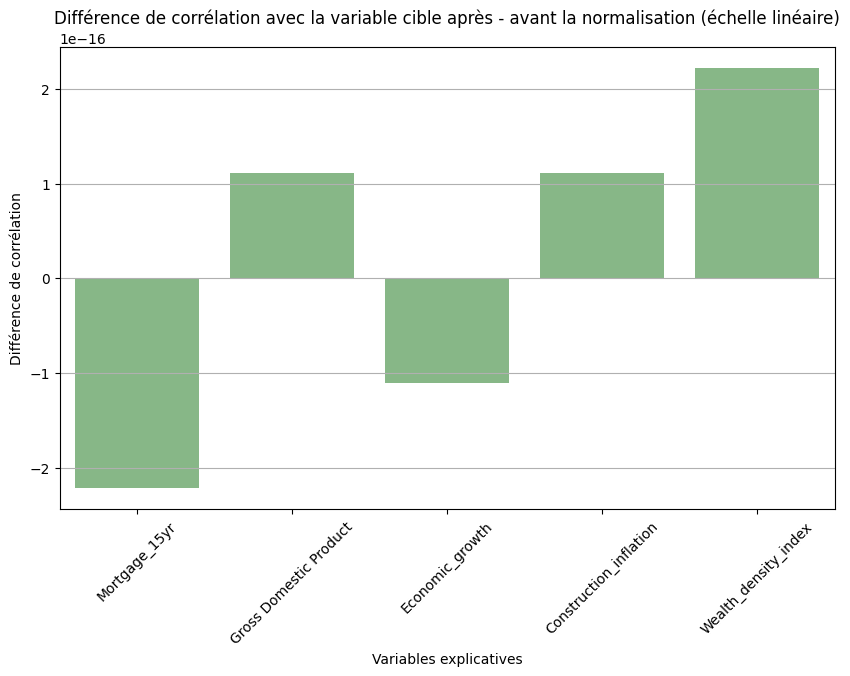

In [7]:
######################      Verfifer  Normalisation avec  MinMaxScaler ###################



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Calcul de la corrélation avant la normalisation en excluant la colonne cible 'Home_price_index'
correlation_before = X.corrwith(y)

# Normalisation des données explicatives
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_scaled, columns=X.columns)

# Calcul de la corrélation après la normalisation
correlation_after = X_normalized.corrwith(y)

# Calcul des différences de corrélation
correlation_difference = correlation_after - correlation_before

# Affichage des différences de corrélation
print("Différences de corrélation après la normalisation :")
print(correlation_difference)
print("corrélation apres la normalisation :")

print(correlation_after)
print("corrélation abant la normalisation :")

print(correlation_before)

# Tracé de la différence de corrélation sur une échelle linéaire
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_difference.index, y=correlation_difference.values, color='green', alpha=0.5)
plt.title('Différence de corrélation avec la variable cible après - avant la normalisation (échelle linéaire)')
plt.xlabel('Variables explicatives')
plt.ylabel('Différence de corrélation')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Ajout d'une grille pour faciliter la lecture
plt.show()




<Figure size 1600x1200 with 0 Axes>

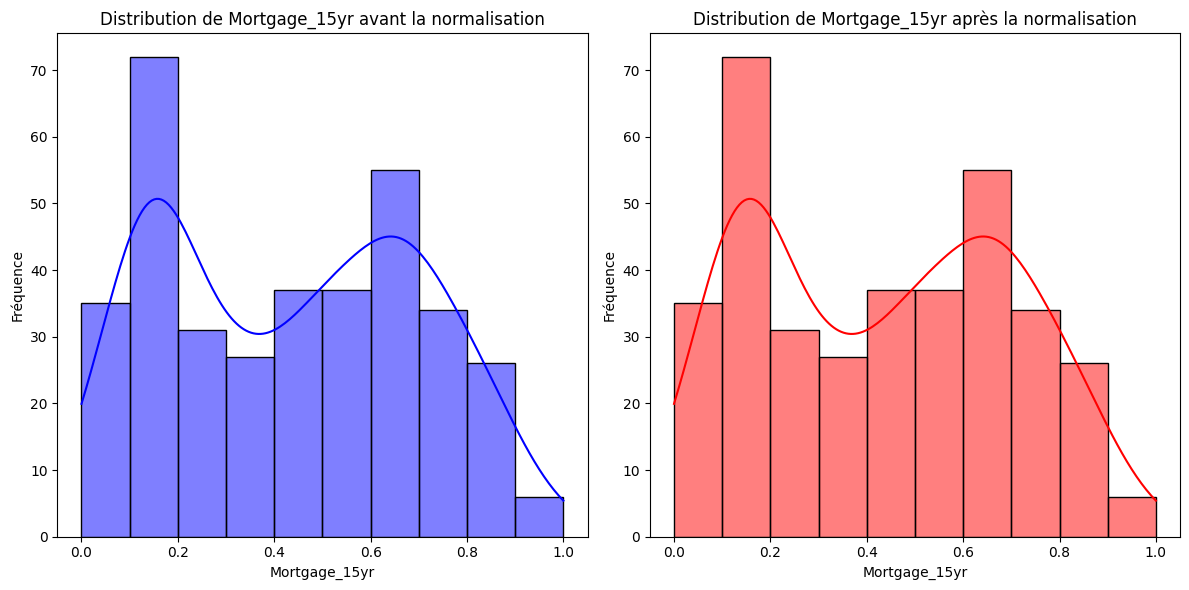

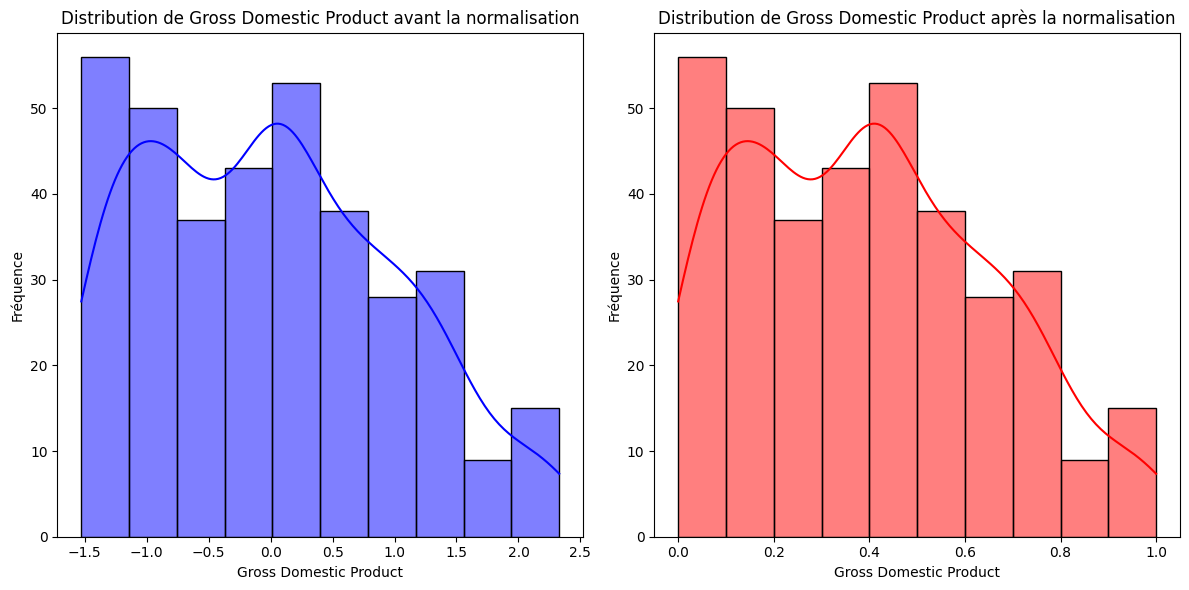

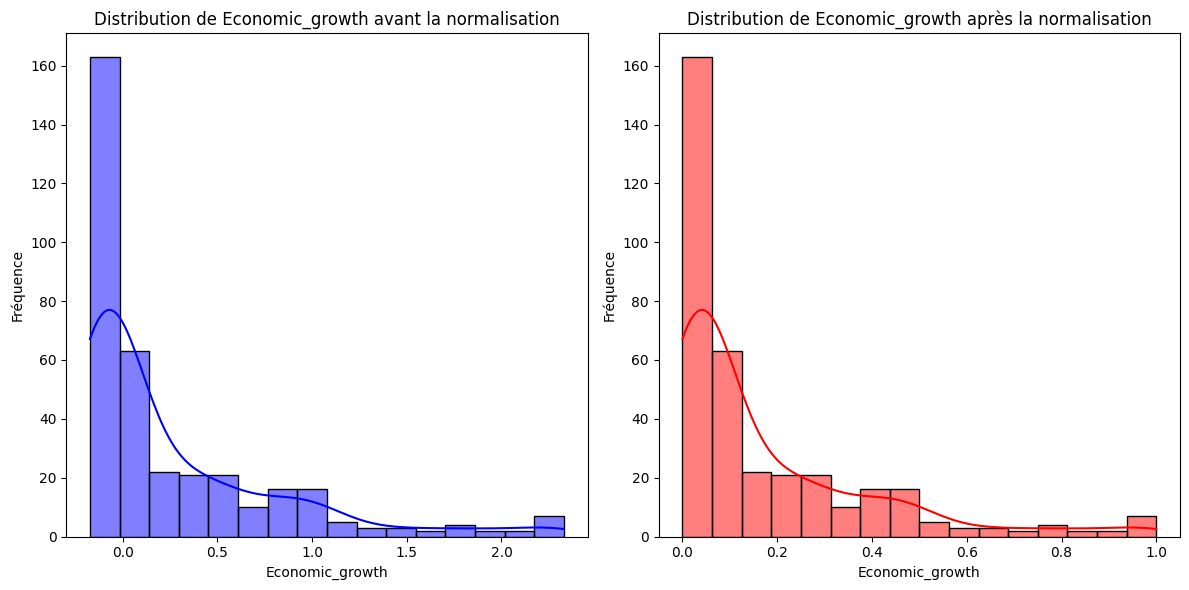

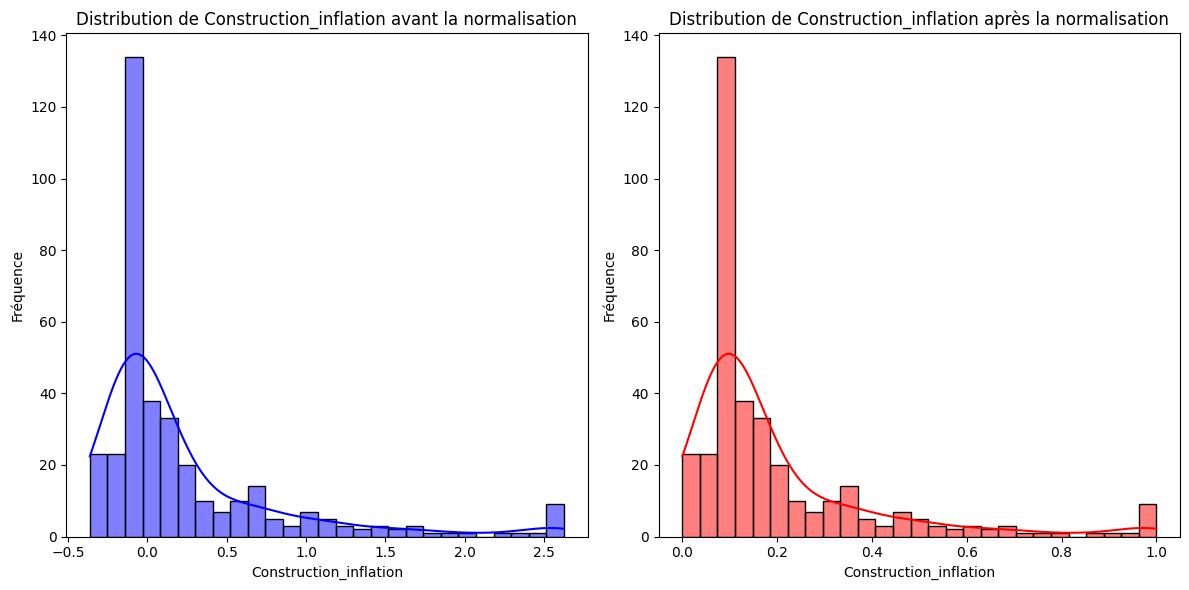

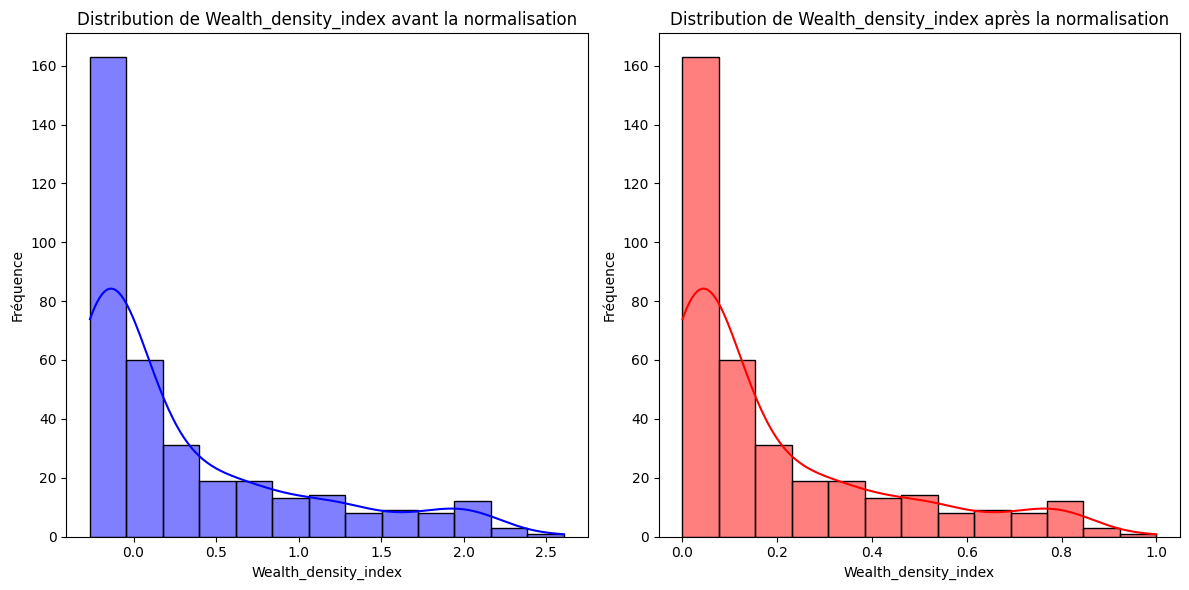

In [8]:
################################ Tracé de la distribution avant et après la normalisation ####################



# Tracé de la distribution avant et après la normalisation pour chaque variable explicative
plt.figure(figsize=(16, 12))
for variable in X.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], color='blue', kde=True)
    plt.title(f'Distribution de {variable} avant la normalisation')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')

    plt.subplot(1, 2, 2)
    sns.histplot(X_normalized[variable], color='red', kde=True)
    plt.title(f'Distribution de {variable} après la normalisation')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')

    plt.tight_layout()
    plt.show()


#La normalisation est nien car elle n'as pas changeé la distribution des variables explicatives 

c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\sit

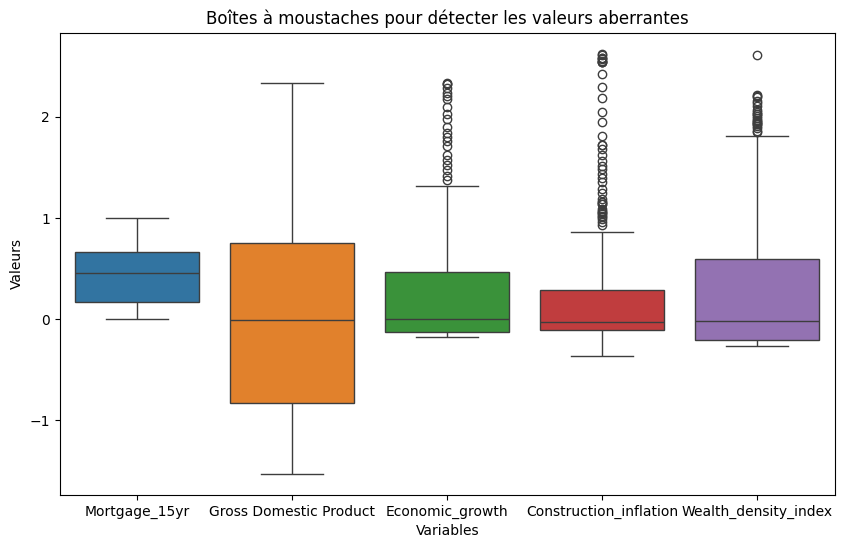

Dates avec des valeurs aberrantes dans Mortgage_15yr:
Series([], Name: DATE, dtype: object)

Dates avec des valeurs aberrantes dans Gross Domestic Product:
Series([], Name: DATE, dtype: object)

Dates avec des valeurs aberrantes dans Economic_growth:
339    2021-04-01
340    2021-05-01
341    2021-06-01
342    2021-07-01
343    2021-08-01
344    2021-09-01
345    2021-10-01
346    2021-11-01
347    2021-12-01
348    2022-01-01
349    2022-02-01
350    2022-03-01
351    2022-04-01
352    2022-05-01
353    2022-06-01
354    2022-07-01
355    2022-08-01
356    2022-09-01
357    2022-10-01
358    2022-11-01
359    2022-12-01
Name: DATE, dtype: object

Dates avec des valeurs aberrantes dans Construction_inflation:
318    2019-07-01
319    2019-08-01
320    2019-09-01
321    2019-10-01
322    2019-11-01
323    2019-12-01
324    2020-01-01
325    2020-02-01
326    2020-03-01
327    2020-04-01
328    2020-05-01
329    2020-06-01
330    2020-07-01
331    2020-08-01
332    2020-09-01
333    2020

'Nombre de lignes avec des valeurs aberrantes dans Economic_growth: 21\nNombre de lignes avec des valeurs aberrantes dans Construction_inflation: 42\nNombre de lignes avec des valeurs aberrantes dans Wealth_density_index: 23'

In [9]:
####################### Traitement des valeurs aberantes
dfor = pd.read_csv('data\\DATA_avecfeatures.csv', header=0)

import numpy as np
df=dfor.drop(columns=['DATE','Home_price_index'])
# Visualisation des boîtes à moustaches pour détecter les valeurs aberrantes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boîtes à moustaches pour détecter les valeurs aberrantes')
plt.xlabel('Variables')
plt.ylabel('Valeurs')
plt.show()


# Chargement des données et suppression des colonnes inutiles
df_org = pd.read_csv('data\\DATA_avecfeatures.csv', header=0)
df = df_org.drop(columns=['DATE', 'Home_price_index'])

# Identification des indices des lignes contenant des valeurs aberrantes dans chaque colonne
outliers = {}
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index

# Récupération des dates correspondant aux lignes avec des valeurs aberrantes
dates_aberrantes = {}
for column, index_list in outliers.items():
    dates_aberrantes[column] = df_org.loc[index_list, 'DATE']

# Affichage des dates correspondant aux valeurs aberrantes
for column, dates in dates_aberrantes.items():
    print(f"Dates avec des valeurs aberrantes dans {column}:\n{dates}\n")

"""Nombre de lignes avec des valeurs aberrantes dans Economic_growth: 21
Nombre de lignes avec des valeurs aberrantes dans Construction_inflation: 42
Nombre de lignes avec des valeurs aberrantes dans Wealth_density_index: 23"""

## On remaqrue que les date qui presentes des val abearntes sont les memes pour tous les var donc on supprime 
#les 2 anne 2021  et 2022 



AVA?T SUPRESSION DES ANNES ABERANTES 


c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\sit

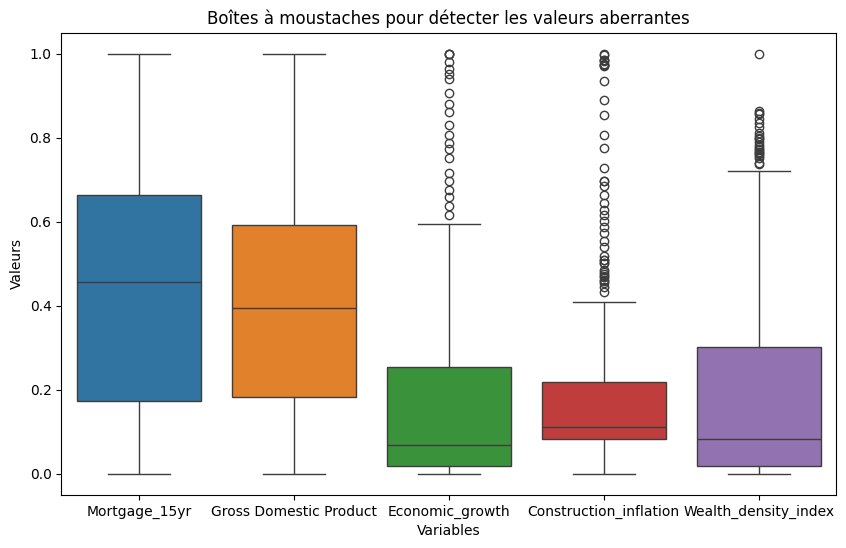

APRES SUPRESSION DES ANNES ABERANTES 


c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\sit

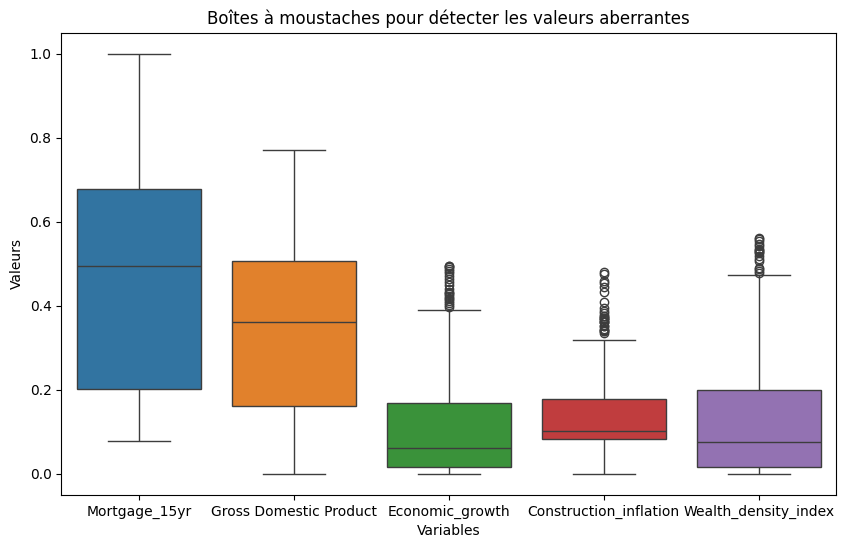

In [10]:
################################ Resultat du traitement 
#Normaliser avec  MinMaxScaler et supprimer anne 2021 ET 2022

# Charger les données
df = pd.read_csv('data\\DATA_avecfeatures.csv')



# Supprimer les colonnes 'DATE' et 'Home_price_index' avant la normalisation
columns_to_normalize = df.drop(columns=['DATE', 'Home_price_index']).columns

# Créer un objet MinMaxScaler
scaler = MinMaxScaler()

# Normaliser les données
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Filtrer les lignes où le mois est compris entre janvier 2021 et décembre 2022
print('AVA?T SUPRESSION DES ANNES ABERANTES ')
# Visualisation des boîtes à moustaches pour détecter les valeurs aberrantes
plt.figure(figsize=(10, 6))
sns.boxplot(data= df.drop(columns=['DATE', 'Home_price_index']))
plt.title('Boîtes à moustaches pour détecter les valeurs aberrantes')
plt.xlabel('Variables')
plt.ylabel('Valeurs')
plt.show()

print('APRES SUPRESSION DES ANNES ABERANTES ')
df = df[~df['DATE'].str.startswith('2021') & ~df['DATE'].str.startswith('2022')& ~df['DATE'].str.startswith('2020')]

# Visualisation des boîtes à moustaches pour détecter les valeurs aberrantes
plt.figure(figsize=(10, 6))
sns.boxplot(data= df.drop(columns=['DATE', 'Home_price_index']))
plt.title('Boîtes à moustaches pour détecter les valeurs aberrantes')
plt.xlabel('Variables')
plt.ylabel('Valeurs')
plt.show()

df.to_csv('data\\Data_avecfeature_clean_normalisé.csv', index=False)
